# <center> Simulación caso de Negocio - Sistemas de recomendación</center>

El objetivo de esta actividad es diseñar e implementar un sistema de recomendación en Python para la resolución de un problema en el que cuenta con variables numéricas y categóricas y en el que se busca fortalecer los conocimientos teóricos y prácticos de la aplicación un sistema de recomendación en una empresa. 

💡 _**Nota**_: _Este material ha sido preparado por la **Universidad de las Américas - UDLA**. Parte del contenido ha sido adaptado a partir de material público liberado en [Kaggle](http://kaggle.com), [Datacamp](http://datacamp.com) y otros sitios web._

## Sobre la empresa



**Netflix, Inc.** es una empresa de entretenimiento y una plataforma de streaming estadounidense. Ubicada en Los Gatos (California), la compañía fue fundada el 29 de agosto de 1997 y un año después comenzó su actividad, ofreciendo un servicio de alquiler de DVD a través del correo postal. Actualmente, **Netflix** participa en la producción de obras audiovisuales, desde la creación o adquisición del producto hasta su difusión mundial.

**Netflix** es uno de los servicios de entretenimiento por suscripción más populares en todo el mundo, con presencia en más de 50 países y aproximadamente 62 millones de usuarios. Esta plataforma de streaming ofrece a sus miembros una amplia variedad de series y películas disponibles para ver en diferentes dispositivos con conexión a internet, y según el plan elegido, también permite descargar contenido para ver sin conexión.

Entre las ventajas que se mencionan de **Netflix**, se destaca la posibilidad de controlar cuándo y dónde ver el contenido, gracias a la amplia disponibilidad de la plataforma en diferentes dispositivos. Además, su producción propia de series y películas ha llegado a niveles de popularidad en los últimos tiempos, lo que ha multiplicado las suscripciones.


## 1. Evaluación de necesidades del negocio
La fase de evaluación del caso de negocio requiere que se cree, evalúe y apruebe un caso de negocio antes de proceder a las tareas reales de análisis práctico.

En el 2000, aún con el alquiler de DVD como único servicio, **Netflix** introduce un sistema de recomendación personalizado, basado en la calificación de una a cinco estrellas que sus clientes hacían de los materiales que alquilaban a través de su sitio por Internet. La mejora continua de este sistema —que en 2017 sería cambiado por uno de «pulgar arriba/abajo»—, así como el uso de otros datos que la plataforma obtiene de sus clientes conocido como minería de datos, es considerado como la causa principal del éxito de la compañía.

Bajo esa premisa, **Netflix** está constantemente mejorando su sistema de recomendación a través de la investigación y la implementación de nuevas tecnologías, como la inteligencia artificial y el análisis de datos. Es por ello, que el equipo técnico de la empresa ha decidido poner a prueba los resultados de su sistema de recomendación actual a través de la creación de un nuevo motor de recomendaciones _Content Based Filtering(Filtrado basado en el contenido) y a traves de ello cumplir con lo siguiente:

1. Conocer los contenidos disponibles en los distintos países.
2. Identificar contenidos similares mediante la comparación de características basadas en texto.
3. Análisis de la red de Actores / Directores y encontrar ideas interesantes.

# 2. Identificación de datos
La etapa de identificación de datos consiste en identificar los conjuntos de datos necesarios para el proyecto de análisis y sus fuentes.


**Dataset:** 

Este conjunto de datos tabulares se compone de todas las películas y programas de televisión disponibles en **Netflix**, junto con detalles como el reparto, los directores, las puntuaciones, el año de estreno, la duración, etc.

**Diccionario de datos**

  
* `show_id`: Identificación única para cada película/programa de TV 
* `type`: Identificador - Una película o programa de televisión     
* `title`: Título de la película/programa de TV 
* `director`: Nombre del Director
* `cast`: Actores que participan en la película/programa de TV   
* `country`: País donde se produjo la película/programa de TV  
* `date_added`: Fecha en que se añadió a Netflix  
* `release_year`: Año de lanzamiento de la película/programa de TV  
* `rating`: Calificación televisiva de la película/programa de TV        
* `duration`: Duración total (en minutos o número de temporadas)   
* `listed_in`: Género    
* `description`: Breve descripción

# 3. Adquisición y filtrado de datos
Durante la etapa de adquisición y filtrado de datos se recopilan los datos de todas las fuentes de datos que se identificaron durante la etapa Identificación de datos.

# 4. Extracción de datos
Durante esta etapa se debe extraer datos dispares y transformarlos en un formato que pueda facilitar el análisis de datos. 

**Importar librerías**
```Python
# Sintaxis general
import modulo as alias
- **modulo**: (módulo) librería a importar.
- **alias**: alias con el nos referiremos a la libería. 
Ejemplo: 
  - Importamos la librería pandas:
import pandas as pd
```

In [ ]:

import pandas as pd
import numpy as np
import time
import turicreate as tc

**Cargar el dataset**

```Python
Leemos un archivo usando el alias **pd**, luego punto **.**, y a seguir la función a utilizar **read_csv**.
Ejemplo:
df = pd.read_csv("data/nombre_archivo.csv")
```

In [3]:
df = pd.read_csv("./netflix_titles.csv")


# 5.Validación y limpieza de datos
Los datos no válidos pueden sesgar y falsear los resultados de los análisis. La etapa de validación y depuración de datos se enfoca en establecer reglas de validación a menudo complejas y a eliminar cualquier dato no válido conocido.

**EDA - Análisis exploratorio de datos**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


**Limpieza de datos**

In [8]:
df.size
df.shape
df.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [16]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [20]:
df['type'].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

In [26]:
df.info()
df.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


(6234, 12)

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64


<AxesSubplot:>

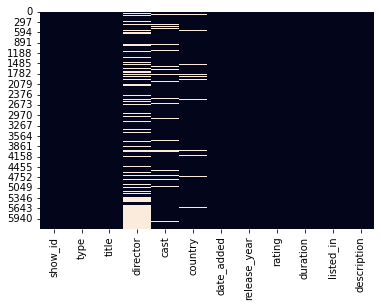

In [27]:

print(df.isnull().sum())

# 
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

**Transformación de datos**

In [23]:

dataset = df[["country","type"]]
display(dataset)


,country,type
0,"United States, India, South Korea, China",Movie
1,United Kingdom,Movie
2,United States,TV Show
3,United States,TV Show
4,United States,Movie
...,...,...
6229,United States,TV Show
6230,United States,TV Show
6231,NaN,Movie
6232,United Kingdom,TV Show


In [29]:
dataset_transformado =  dataset.groupby(["country","type"]).value_counts()
dataset_transformado.head()

country                                              type   
Argentina                                            Movie      26
                                                     TV Show    12
Argentina, Brazil, France, Poland, Germany, Denmark  Movie       1
Argentina, Chile                                     Movie       1
Argentina, Chile, Peru                               Movie       1
dtype: int64

# 6. Agregación y representación de datos
La etapa de agregación y representación de datos, se dedica a integrar múltiples conjuntos de datos para obtener una visión unificada.

Lamentablemente no pude continuar con el estudio del caso debido a la instalación de la librería turicreate, probé instalando wsp en windows y no funcionó ya que trabajo en ubuntu instalé una máquina virtual usando virtual box y tampoco funcionó .

# 7. Análisis de datos
La etapa de análisis de datos se enfoca en llevar a cabo la tarea de análisis propiamente dicha, que suele implicar uno o más tipos de análisis

## Implementación

### Entrenamiento del modelo K-means

# 8. Visualización de datos
La capacidad de analizar grandes cantidades de datos y obtener información útil tiene poco valor si los únicos que pueden interpretar los resultados son los analistas.
La etapa de visualización de datos se dedica a utilizar técnicas y herramientas de visualización de datos para comunicar gráficamente los resultados del análisis con vistas a una interpretación eficaz por parte de los usuarios empresariales.

# 9. Utilización de los resultados del análisis
Después de que los resultados del análisis se pongan a disposición de los usuarios de negocio para apoyar la toma de decisiones empresariales, por ejemplo a través de cuadros de mando o paneles, puede haber más oportunidades para utilizar los resultados del análisis. La etapa de utilización de los resultados del análisis, esta enfocada en determinar cómo y dónde se pueden aprovechar más los datos del análisis procesado.

In [ ]:
# Haga un breve análisis de los hallazgos 


In [ ]:
# Detalle sus conclusiones sobre el modelo obtenido


In [ ]:
# Qué acciones sugerería a los directivos de la empresa?
